In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [ ]:
df = pd.read_csv("deliveries.csv")
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40745,419162,1,Mumbai Indians,Royal Challengers Bangalore,15,2,SS Tiwary,JH Kallis,AT Rayudu,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN
40746,419162,1,Mumbai Indians,Royal Challengers Bangalore,15,3,AT Rayudu,JH Kallis,SS Tiwary,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN
40747,419162,1,Mumbai Indians,Royal Challengers Bangalore,15,4,SS Tiwary,JH Kallis,AT Rayudu,4.0,0.0,4.0,NaN,0.0,NaN,NaN,NaN
40748,419162,1,Mumbai Indians,Royal Challengers Bangalore,15,5,SS Tiwary,JH Kallis,AT Rayudu,4.0,0.0,4.0,NaN,0.0,NaN,NaN,NaN


In [ ]:

df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


In [ ]:

df.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,1
batsman_runs,1


In [ ]:
columns_to_drop = ['extras_type', 'player_dismissed', 'dismissal_kind', 'fielder']
df = df.drop(columns=columns_to_drop, axis=1)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,1
batsman_runs,1


In [ ]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'is_wicket'],
      dtype='object')

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

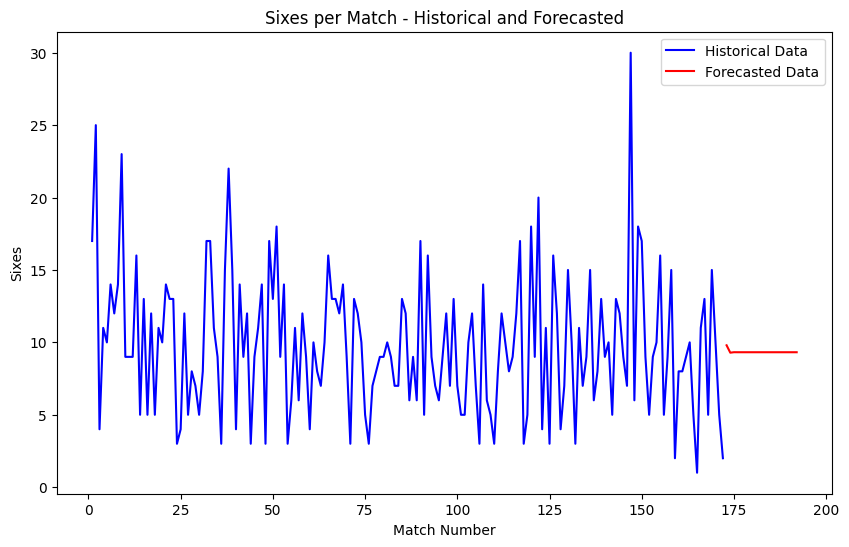

172    9.798918
173    9.287981
174    9.321454
175    9.319261
176    9.319405
177    9.319395
178    9.319396
179    9.319396
180    9.319396
181    9.319396
182    9.319396
183    9.319396
184    9.319396
185    9.319396
186    9.319396
187    9.319396
188    9.319396
189    9.319396
190    9.319396
191    9.319396
Name: predicted_mean, dtype: float64


In [ ]:
df['sixes'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

match_sixes = df.groupby('match_id')['sixes'].sum().reset_index()

match_sixes['match_number'] = range(1, len(match_sixes) + 1)
match_sixes.set_index('match_number', inplace=True)

model = ARIMA(match_sixes['sixes'], order=(1, 1, 1))
model_fit = model.fit()

forecast_steps = 20
forecast_arima = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 6))
plt.plot(match_sixes['sixes'], label='Historical Data', color='blue')
plt.plot(range(len(match_sixes) + 1, len(match_sixes) + 1 + forecast_steps),
         forecast_arima, label='Forecasted Data', color='red')
plt.title('Sixes per Match - Historical and Forecasted')
plt.xlabel('Match Number')
plt.ylabel('Sixes')
plt.legend()
plt.show()

print(forecast_arima)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


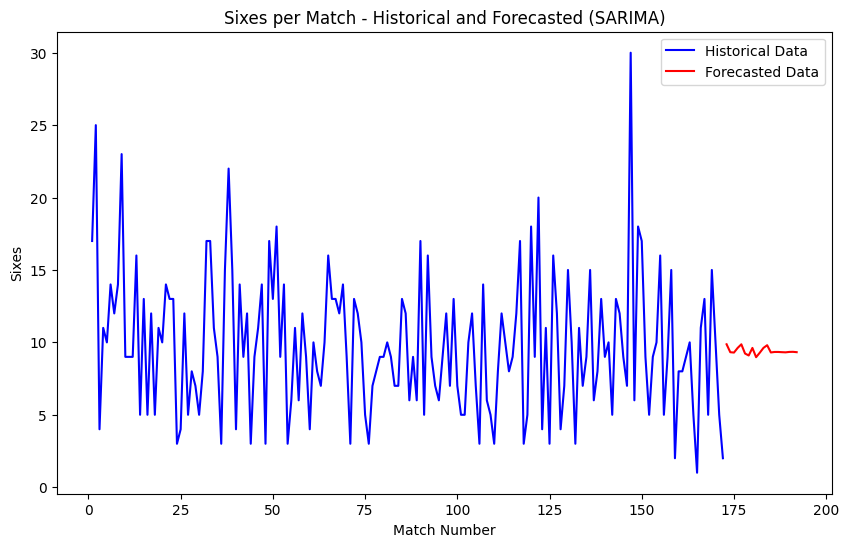

172    9.868727
173    9.320737
174    9.296210
175    9.617217
176    9.867148
177    9.229859
178    9.095473
179    9.617260
180    8.976449
181    9.287630
182    9.620363
183    9.804763
184    9.303885
185    9.337608
186    9.338174
187    9.323649
188    9.312311
189    9.341215
190    9.347310
191    9.323645
Name: predicted_mean, dtype: float64


In [ ]:
df['sixes'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

match_sixes = df.groupby('match_id')['sixes'].sum().reset_index()

match_sixes['match_number'] = range(1, len(match_sixes) + 1)
match_sixes.set_index('match_number', inplace=True)

model = SARIMAX(match_sixes['sixes'], order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
model_fit = model.fit(disp=False)

forecast_steps = 20
forecast_sarima = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 6))
plt.plot(match_sixes['sixes'], label='Historical Data', color='blue')
plt.plot(range(len(match_sixes) + 1, len(match_sixes) + 1 + forecast_steps),
         forecast_sarima, label='Forecasted Data', color='red')
plt.title('Sixes per Match - Historical and Forecasted (SARIMA)')
plt.xlabel('Match Number')
plt.ylabel('Sixes')
plt.legend()
plt.show()

print(forecast_sarima)

In [ ]:
#evaluation of arima model
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:

train_size = int(len(match_sixes) * 0.8)
train, test = match_sixes['sixes'][:train_size], match_sixes['sixes'][train_size:]

# Fit the ARIMA model on the training set
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test))

# Calculate evaluation metrics
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Akaike Information Criterion (AIC):", model_fit.aic)
print("Bayesian Information Criterion (BIC):", model_fit.bic)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Mean Absolute Error (MAE): 3.8220102273099097
Mean Squared Error (MSE): 29.560936927088733
Root Mean Squared Error (RMSE): 5.436997050494761
Akaike Information Criterion (AIC): 811.4658432222
Bayesian Information Criterion (BIC): 820.2038078794081


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
#evaluation of sarima model
train_size = int(len(match_sixes) * 0.8)
train, test = match_sixes['sixes'][:train_size], match_sixes['sixes'][train_size:]

# Fit the SARIMA model on the training set
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
model_fit = model.fit(disp=False)

# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test))

# Calculate evaluation metrics
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Akaike Information Criterion (AIC):", model_fit.aic)
print("Bayesian Information Criterion (BIC):", model_fit.bic)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Mean Absolute Error (MAE): 3.797463225423994
Mean Squared Error (MSE): 29.46087574526408
Root Mean Squared Error (RMSE): 5.427787371043939
Akaike Information Criterion (AIC): 815.2649300002538
Bayesian Information Criterion (BIC): 829.8282044289341


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

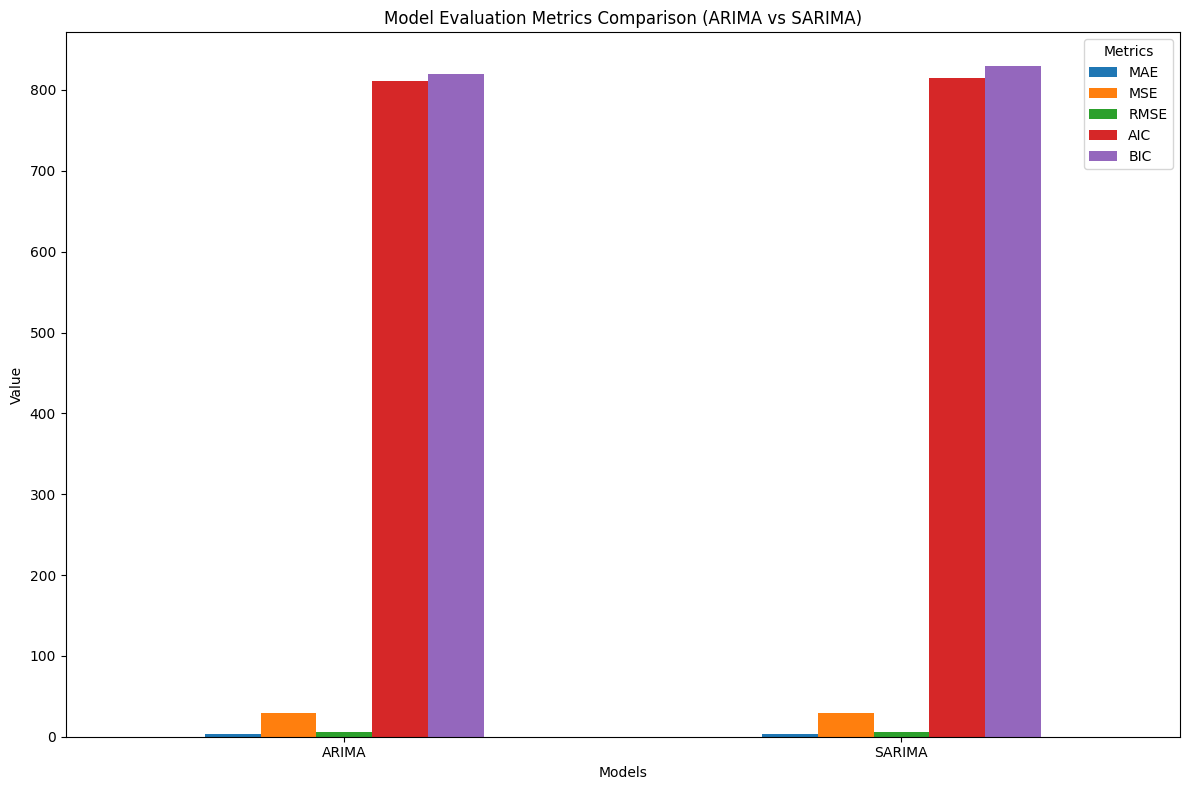

In [ ]:
train_size = int(len(match_sixes) * 0.8)
train, test = match_sixes['sixes'][:train_size], match_sixes['sixes'][train_size:]

# ARIMA Model
arima_model = ARIMA(train, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# SARIMA Model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
sarima_model_fit = sarima_model.fit(disp=False)

# ARIMA Predictions
arima_predictions = arima_model_fit.forecast(steps=len(test))

# SARIMA Predictions
sarima_predictions = sarima_model_fit.forecast(steps=len(test))

# Calculate Evaluation Metrics for ARIMA
arima_mae = mean_absolute_error(test, arima_predictions)
arima_mse = mean_squared_error(test, arima_predictions)
arima_rmse = np.sqrt(arima_mse)
arima_aic = arima_model_fit.aic
arima_bic = arima_model_fit.bic

# Calculate Evaluation Metrics for SARIMA
sarima_mae = mean_absolute_error(test, sarima_predictions)
sarima_mse = mean_squared_error(test, sarima_predictions)
sarima_rmse = np.sqrt(sarima_mse)
sarima_aic = sarima_model_fit.aic
sarima_bic = sarima_model_fit.bic

# Create a DataFrame for easier plotting
metrics = pd.DataFrame({
    'MAE': [arima_mae, sarima_mae],
    'MSE': [arima_mse, sarima_mse],
    'RMSE': [arima_rmse, sarima_rmse],
    'AIC': [arima_aic, sarima_aic],
    'BIC': [arima_bic, sarima_bic]
}, index=['ARIMA', 'SARIMA'])

# Plot the evaluation metrics
metrics.plot(kind='bar', figsize=(12, 8))
plt.title('Model Evaluation Metrics Comparison (ARIMA vs SARIMA)')
plt.ylabel('Value')
plt.xlabel('Models')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

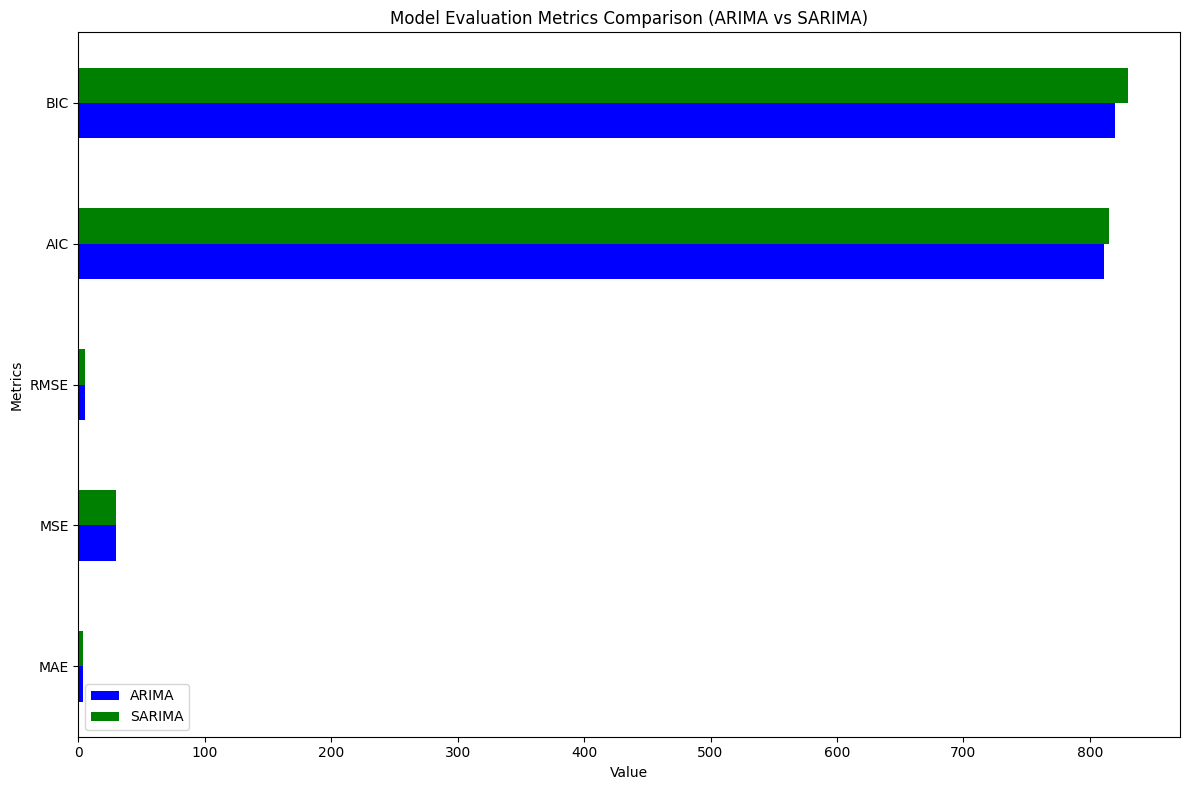

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data into training and testing sets
train_size = int(len(match_sixes) * 0.8)
train, test = match_sixes['sixes'][:train_size], match_sixes['sixes'][train_size:]

# ARIMA Model
arima_model = ARIMA(train, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# SARIMA Model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
sarima_model_fit = sarima_model.fit(disp=False)

# ARIMA Predictions
arima_predictions = arima_model_fit.forecast(steps=len(test))

# SARIMA Predictions
sarima_predictions = sarima_model_fit.forecast(steps=len(test))

# Calculate Evaluation Metrics for ARIMA
arima_mae = mean_absolute_error(test, arima_predictions)
arima_mse = mean_squared_error(test, arima_predictions)
arima_rmse = np.sqrt(arima_mse)
arima_aic = arima_model_fit.aic
arima_bic = arima_model_fit.bic

# Calculate Evaluation Metrics for SARIMA
sarima_mae = mean_absolute_error(test, sarima_predictions)
sarima_mse = mean_squared_error(test, sarima_predictions)
sarima_rmse = np.sqrt(sarima_mse)
sarima_aic = sarima_model_fit.aic
sarima_bic = sarima_model_fit.bic

# Create a DataFrame for easier plotting
metrics = pd.DataFrame({
    'ARIMA': [arima_mae, arima_mse, arima_rmse, arima_aic, arima_bic],
    'SARIMA': [sarima_mae, sarima_mse, sarima_rmse, sarima_aic, sarima_bic]
}, index=['MAE', 'MSE', 'RMSE', 'AIC', 'BIC'])

# Plot the evaluation metrics as horizontal bars
metrics.plot(kind='barh', figsize=(12, 8), color=['blue', 'green'])
plt.title('Model Evaluation Metrics Comparison (ARIMA vs SARIMA)')
plt.xlabel('Value')
plt.ylabel('Metrics')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

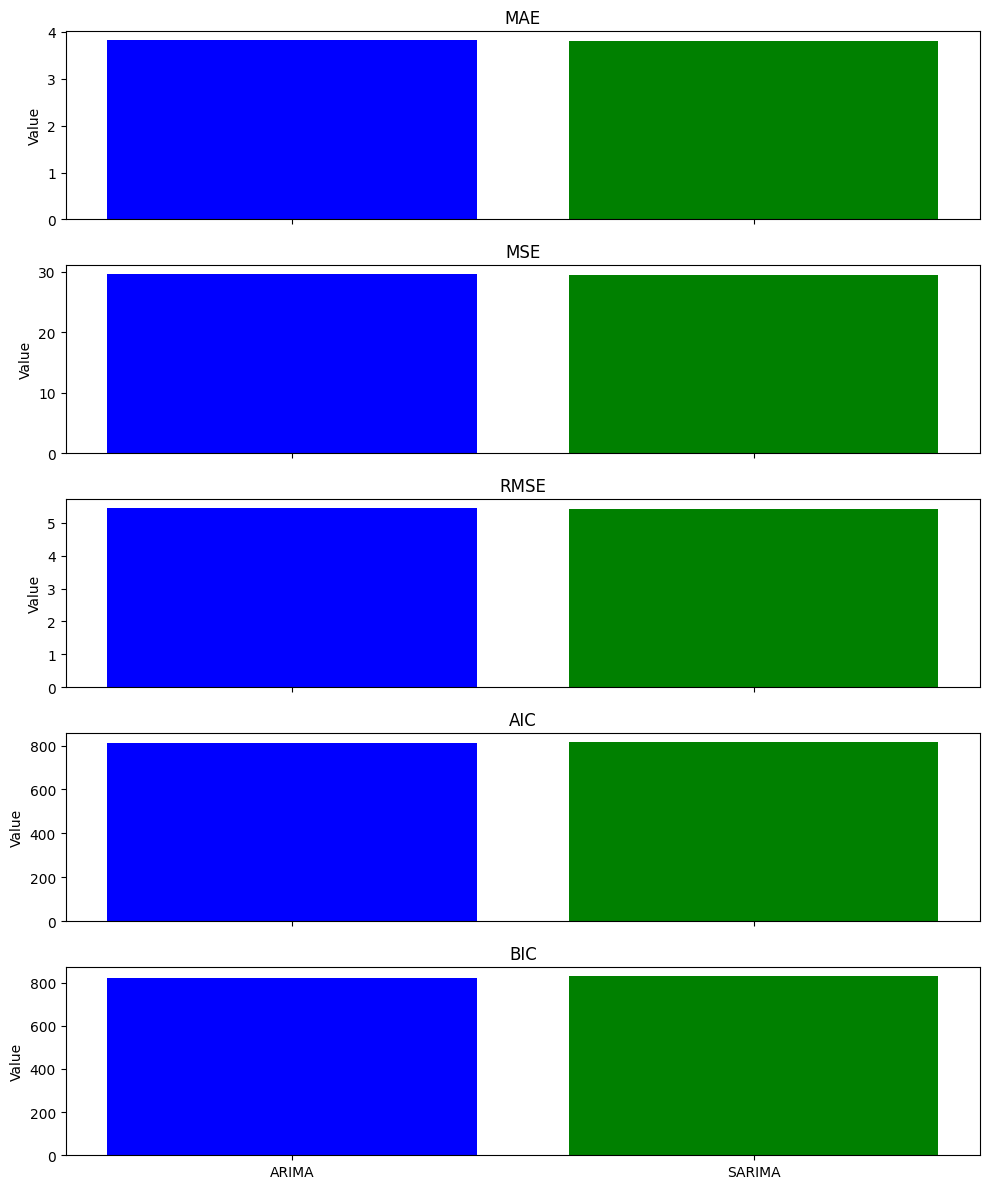

In [ ]:
# Split data into training and testing sets
train_size = int(len(match_sixes) * 0.8)
train, test = match_sixes['sixes'][:train_size], match_sixes['sixes'][train_size:]

# ARIMA Model
arima_model = ARIMA(train, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# SARIMA Model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
sarima_model_fit = sarima_model.fit(disp=False)

# ARIMA Predictions
arima_predictions = arima_model_fit.forecast(steps=len(test))

# SARIMA Predictions
sarima_predictions = sarima_model_fit.forecast(steps=len(test))

# Calculate Evaluation Metrics for ARIMA
arima_metrics = {
    'MAE': mean_absolute_error(test, arima_predictions),
    'MSE': mean_squared_error(test, arima_predictions),
    'RMSE': np.sqrt(mean_squared_error(test, arima_predictions)),
    'AIC': arima_model_fit.aic,
    'BIC': arima_model_fit.bic,
}

# Calculate Evaluation Metrics for SARIMA
sarima_metrics = {
    'MAE': mean_absolute_error(test, sarima_predictions),
    'MSE': mean_squared_error(test, sarima_predictions),
    'RMSE': np.sqrt(mean_squared_error(test, sarima_predictions)),
    'AIC': sarima_model_fit.aic,
    'BIC': sarima_model_fit.bic,
}

# Create a DataFrame for easier plotting
metrics = pd.DataFrame({'ARIMA': arima_metrics, 'SARIMA': sarima_metrics})

# Create subplots for each metric
fig, axes = plt.subplots(5, 1, figsize=(10, 12), sharex=True)

# Metric names
metric_names = ['MAE', 'MSE', 'RMSE', 'AIC', 'BIC']

# Plot each metric as a bar plot on individual subplots
for i, metric in enumerate(metric_names):
    axes[i].bar(['ARIMA', 'SARIMA'], metrics.loc[metric], color=['blue', 'green'])
    axes[i].set_title(metric)
    axes[i].set_ylabel('Value')

# Adjust layout
plt.tight_layout()
plt.show()